In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ids = test['id']
df = pd.concat([train, test])

In [11]:
df = df.drop(columns = ['id'])

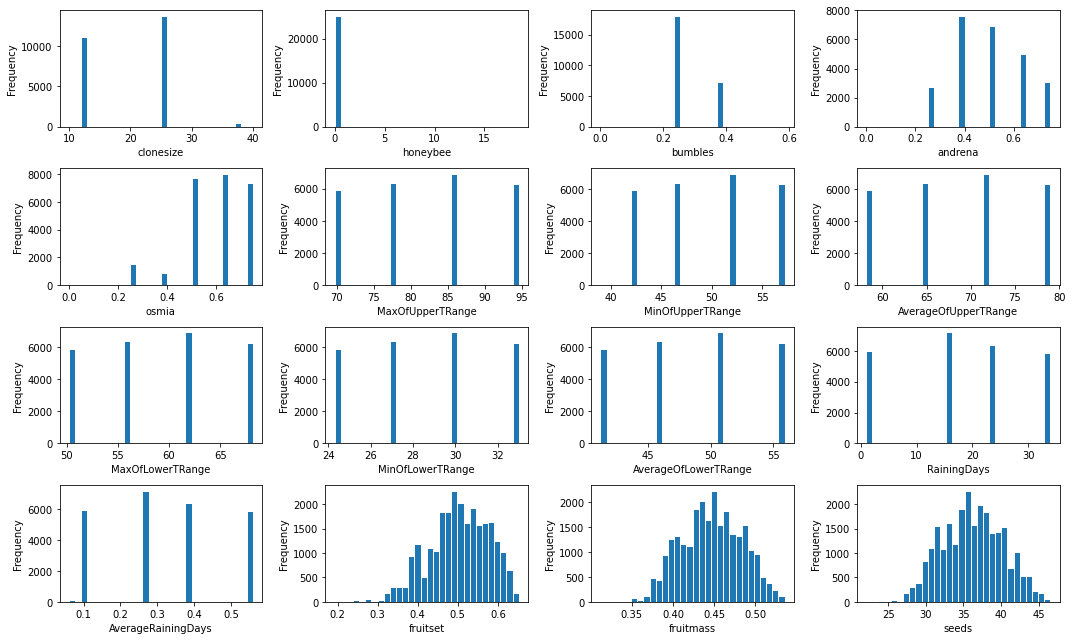

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(15, 9))
axes = axes.flatten()
    
for j, col in enumerate(df.columns[:-1]):
    
    df[col].plot.hist(ax = axes[j], bins = 30, edgecolor='white')
    axes[j].set_xlabel(col)
    
plt.tight_layout()

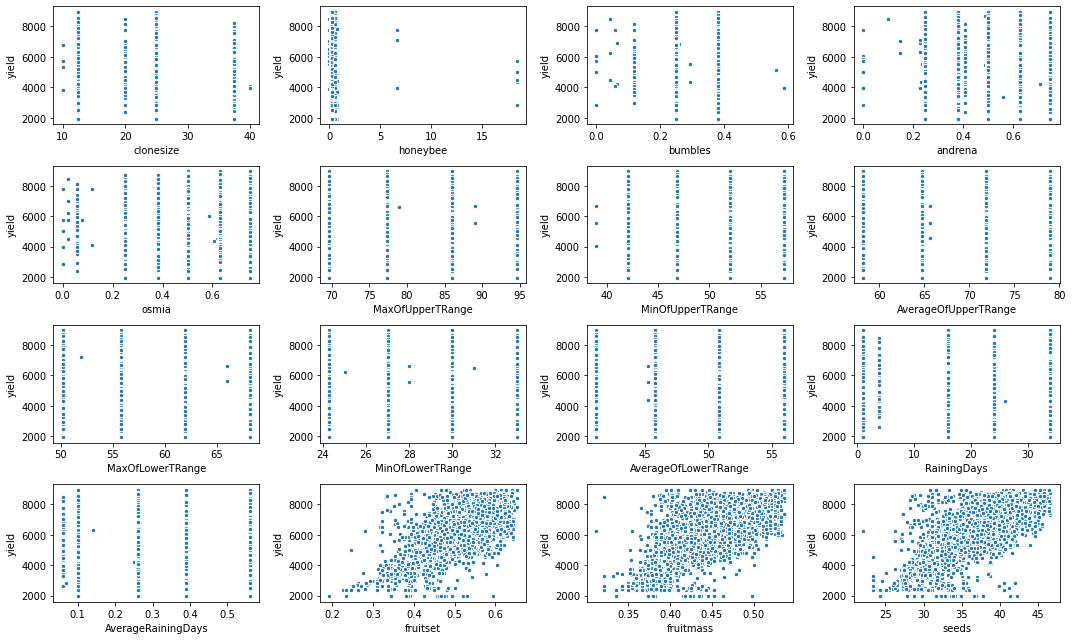

In [20]:
fig, axes = plt.subplots(4, 4, figsize=(15, 9))
axes = axes.flatten()
    
for j, col in enumerate(df.columns[:-1]):
    
    df.plot.scatter(x=col, y='yield', ax = axes[j], edgecolor='white')
    axes[j].set_xlabel(col)
    
plt.tight_layout()

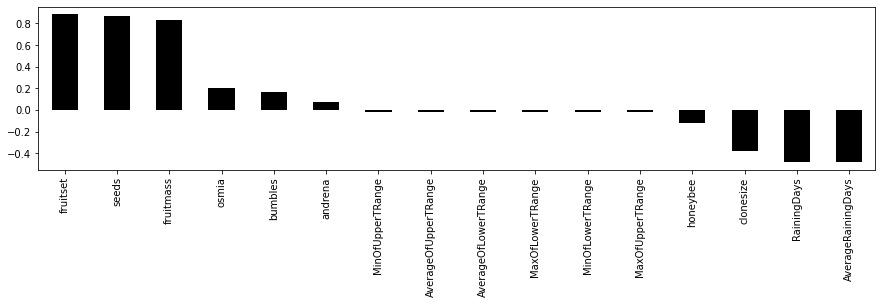

In [21]:
df.corr()['yield'].sort_values(ascending=False)[1:].plot.bar(figsize=(15,3), cmap='copper')
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop(columns='yield')
y = df['yield']

features = X.columns.values

Scaler = StandardScaler()
Scaler.fit(X)
X = Scaler.transform(X)

X = pd.DataFrame(X, columns = features)

X_test = X[len(train):]
X = X.iloc[:len(train)]
y = y.iloc[:len(train)]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [23]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

print("Training score: ", model.score(X_train, y_train))
print("Validation score: ", model.score(X_valid, y_valid))

Training score:  0.811683871947476
Validation score:  0.805615773965401


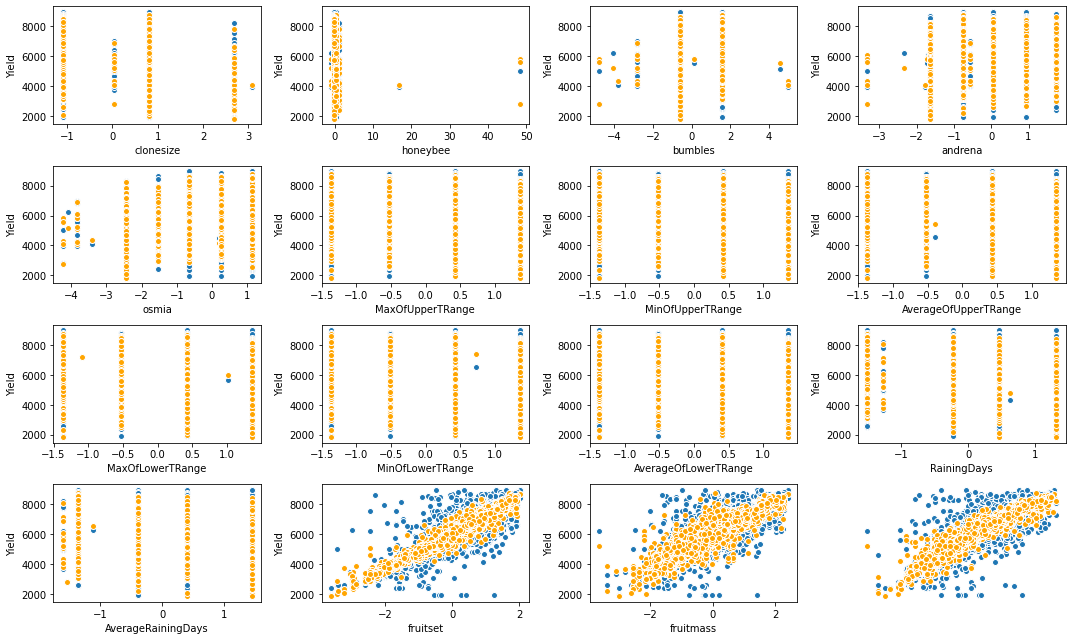

In [27]:
fig, axes = plt.subplots(4, 4, figsize=(15, 9))
axes = axes.flatten()
for j, col in enumerate(df.columns[:-1]):
    axes[j].scatter(X_valid[col], y_valid, edgecolor='white')
    axes[j].scatter(X_valid[col], model.predict(X_valid), edgecolor='white', color='orange')
    axes[j].set_xlabel(col)
    axes[j].set_ylabel("Yield")

axes[-1].axis('off')
    
plt.tight_layout()

In [29]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

print("Training score: ", model.score(X_train, y_train))
print("Validation score: ", model.score(X_valid, y_valid))

Training score:  0.9275009000584795
Validation score:  0.8031773433222228


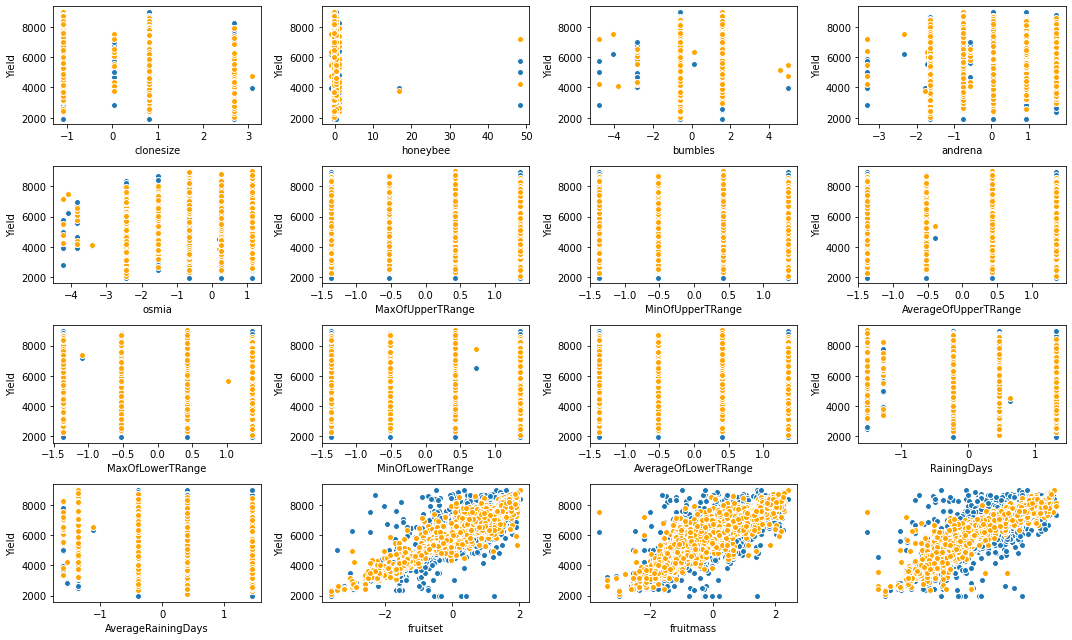

In [31]:
fig, axes = plt.subplots(4, 4, figsize=(15, 9))
axes = axes.flatten()
for j, col in enumerate(df.columns[:-1]):
    axes[j].scatter(X_valid[col], y_valid, edgecolor='white')
    axes[j].scatter(X_valid[col], model.predict(X_valid), edgecolor='white', color='orange')
    axes[j].set_xlabel(col)
    axes[j].set_ylabel("Yield")

axes[-1].axis('off')
    
plt.tight_layout()

In [35]:
final_model = Ridge()
model.fit(X, y)
print("Training score: ", model.score(X, y))
y_test_pred = model.predict(X_test)

Training score:  0.9130116643176


In [36]:
output = pd.DataFrame({'id': ids, 'yield': y_test_pred})

In [37]:
output.to_csv("Submission.csv", index=False)